# PTID-CDS-APR-23-1506.

## Project Name: Heart  Diease Prediction

###	Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

## Understanding the Problem Statement in this Business Case :

Day by day the cases of heart diseases are increasing at a rapid rate and it’s very Important
and concerning to predict any such diseases beforehand. This diagnosis is a difficult task i.e. it should be performed precisely and efficiently.We need a heart disease prediction system to predict whether the patient is likely to be diagnosed with a heart disease or not using the medical history of the patient.

In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [5]:
#Reading Values and labels dataset in a different DataFrames
data_val = pd.read_csv('values.csv')
data_lab = pd.read_csv('labels.csv')


# Domain Analysis

- **patient_id** = ID of particular patient
- **slope_of_peak_exercise_st_segment** = While a high ST depression is considered normal & healthy. The “ slope ” hue, refers to the peak exercise ST
- **thal** = A blood disorder called thalassemia,[normal, reversible defect, fixed defect]
- **resting_blood_pressure** = blood pressure tells a lot about your general health. High blood pressure or hypertension can lead to several heart related
- **chest_pain_type** = Most of the chest pain causes are not dangerous to health, but some are serious, while the least cases are life-threatening.
- **num_major_vessels** = Major Blood Vessels of the Heart: Blood exits the right ventricle through the pulmonary trunk artery. Approximately two inches
- **fasting_blood_sugar_gt_120_mg_per_dl** = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false
- **resting_ekg_results** = The electrocardiogram (ECG or EKG) is a test that measures the heart’s electrical activity, and a resting ECG is
- **serum_cholesterol_mg_per_dl** = A person’s serum cholesterol level represents the amount of total cholesterol in their blood. A person’s serum
- **oldpeak_eq_st_depression** = oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
- **sex** = sex (1 = male; 0 = female)
- **Age** = Age of patients
- **max_heart_rate_achieved** = This is the average maximum number of times your heart should beat per minute during exercise.
- **exercise_induced_angina** = Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.[0: no, 1: yes]
- **heart_disease_present** = Target variable 0:No heart disease, 1:heart disease

In [6]:
# Displaying the value data
data_val.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [305]:
# Renaming "patient_id" of labels dataframe
data_lab.rename(columns={'patient_id':'p_id'},inplace=True)

In [306]:
# concatenate data_val and data_lab in new dataframe
data = pd.DataFrame()
data = pd.concat([data_val,data_lab],axis=1)
data.drop('p_id',axis=1,inplace=True) # we remove the p_id
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Basic Checks

In [307]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [308]:
data.shape

(180, 15)

In [309]:
# Statistical details for numerical variable
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [310]:
# Unique represents how many unique labels are present in the feature
data.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [311]:
data.info()
# No missing values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [312]:
print('Train Data | Data Types')
print('Object: ', data.dtypes[data.dtypes==object].count())
print('Numeric: ',data.dtypes[data.dtypes!=object].count())

Train Data | Data Types
Object:  2
Numeric:  13


In [313]:
## To check Null
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [314]:
#Checking the distribution of Target Variable
data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [315]:
for column in data:
    print(column)

    

patient_id
slope_of_peak_exercise_st_segment
thal
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
heart_disease_present


In [316]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [317]:
data.num_major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

In [318]:
data.shape

(180, 15)

In [319]:
data.value_counts

<bound method DataFrame.value_counts of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128 

# EDA


### Univariate Analysis

In [320]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


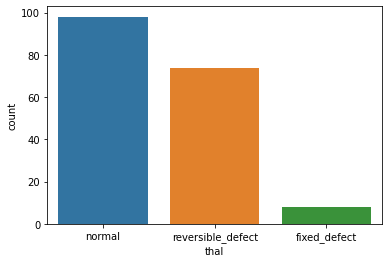

In [321]:
sns.countplot(x='thal',data=data)
plt.show()

In [322]:
# Shows the count of each class in the feature.

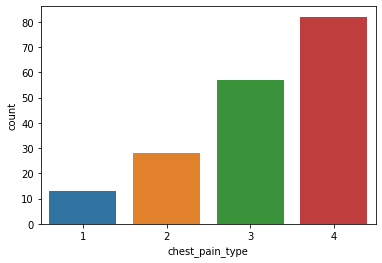

In [323]:
sns.countplot(x='chest_pain_type',data=data)
plt.show()

### Bivariate Analysis

In [324]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [325]:
df = data.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df['sex'] = df['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return ' Heart Disease'
df['heart_disease_present'] = df['heart_disease_present'].apply(chng2)


Text(0.5, 1.0, 'Gender v/s heart_disease_present\n')

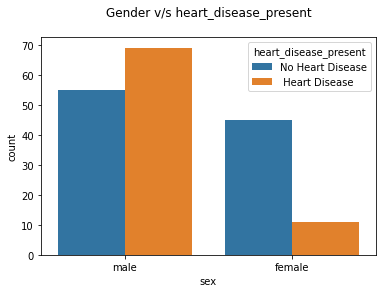

In [326]:

sns.countplot(data= df, x='sex',hue='heart_disease_present')
plt.title('Gender v/s heart_disease_present\n')

### Observation :
- The above graph shows men are more prone to heart disease then women


Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

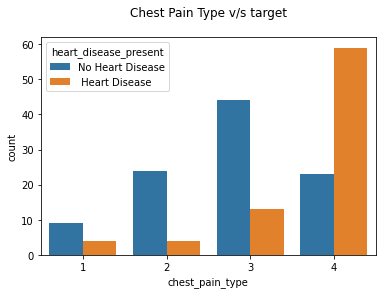

In [327]:
sns.countplot(data= df, x='chest_pain_type',hue='heart_disease_present')
plt.title('Chest Pain Type v/s target\n')


### Observation : As seen, there are 4 types of chest pain
##### 1 : status at least
##### 2 : condition slightly distressed
##### 3 : condition medium problem
##### 4 : condition too bad
- From the above graph we can observe that type 4 chest pain is more prone to heart disease

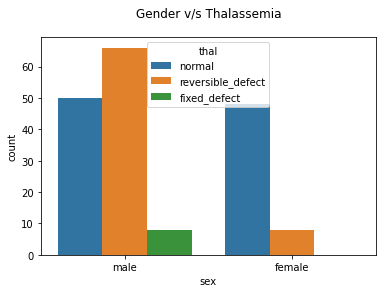

In [328]:
sns.countplot(data= df, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
plt.show()

### Observation : 
- The above graph shows thalassemia count in male and female
- Males are more prone to thalassemia with reversible defect then female

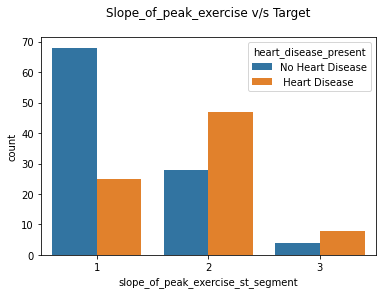

In [329]:
sns.countplot(data=df,x='slope_of_peak_exercise_st_segment',hue='heart_disease_present')
plt.title('Slope_of_peak_exercise v/s Target\n')
plt.show()

### Observation :
- We can see that slope_of_peak_exercise_sat_segment value 1 has more normal people.

### Multivariate Analysis

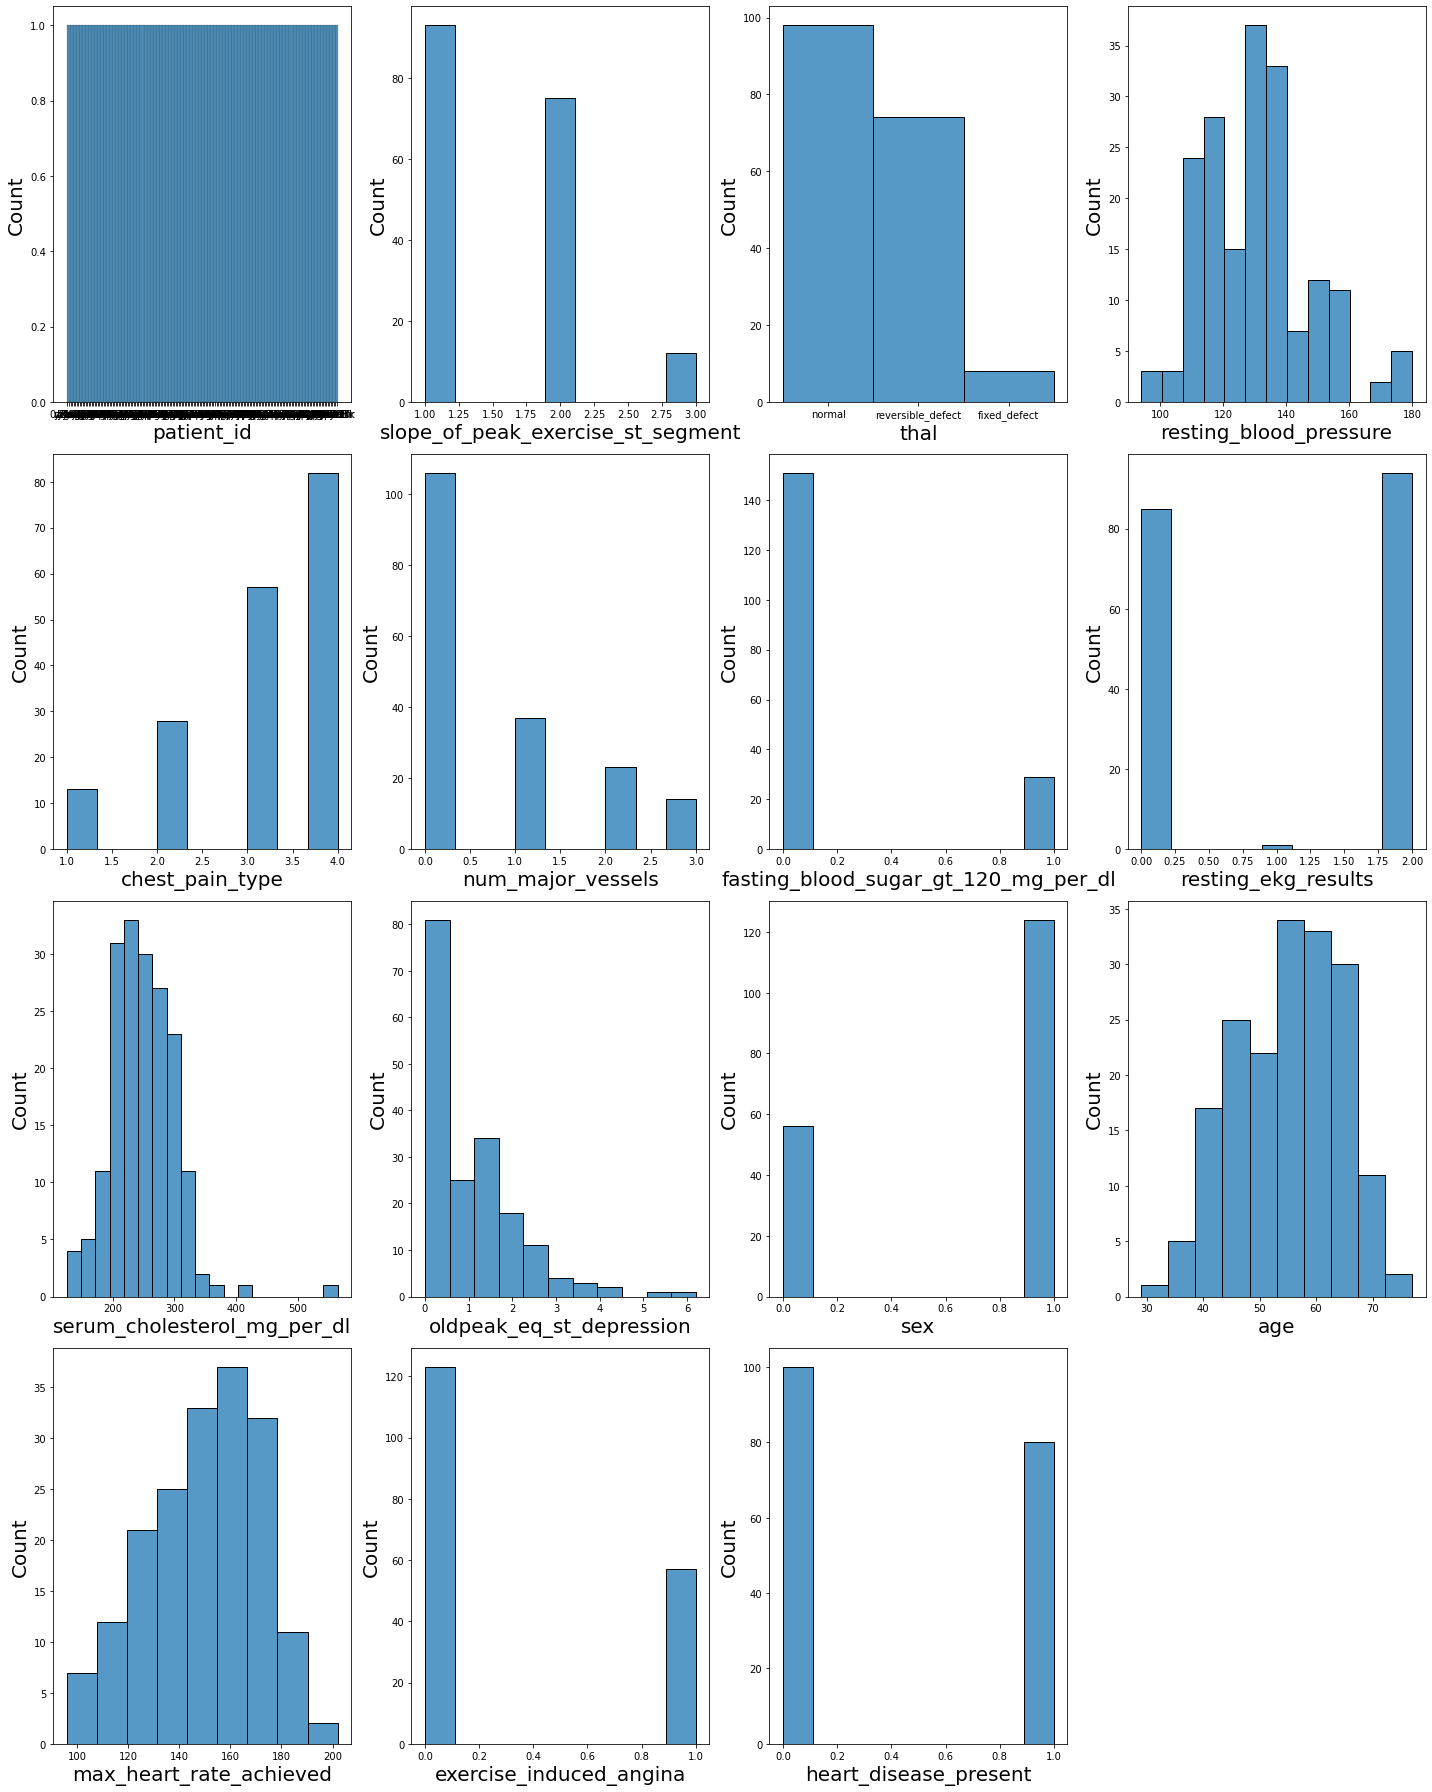

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

### Observation :
 - The above graphs shows the distribution of the data
 - Most of the people are between 55 and 65
 - maximum max_heart_rate_achieved between 140 to 180.
 - maximum serum_cholesterol_mg_per_dl between 200 to 300.
 - There are more healthy patients than  diseased.
 - normal Distribution for : serum_cholesterol_mg_per_dl,resting_blood_pressure and age
 - oldpeak_eq_st_depression right-skewed
 - max_heart_rate_achieved is left-skewed

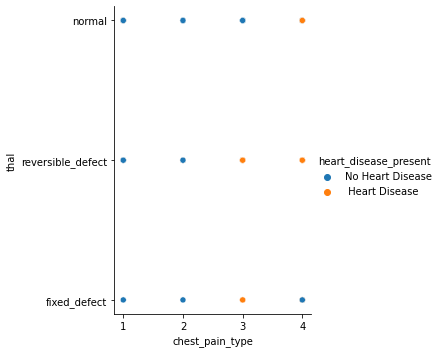

In [34]:
sns.relplot(x='chest_pain_type',y='thal',hue='heart_disease_present',data=df)
plt.show()

### Observation :
- From the above observation if a patient has chest pain type 3 and thal is reversible_defect can have heart disease

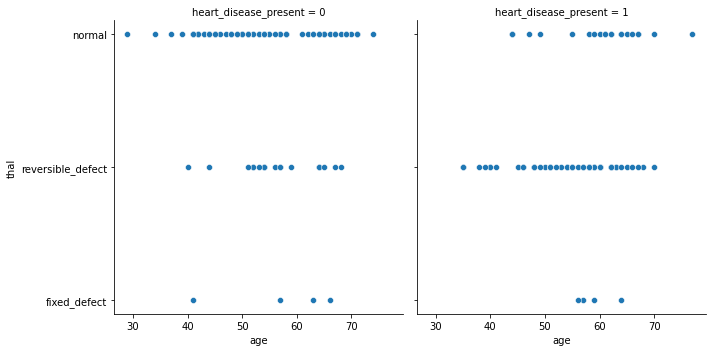

In [25]:
sns.relplot(x='age',y='thal',col='heart_disease_present',data=data)
plt.show()

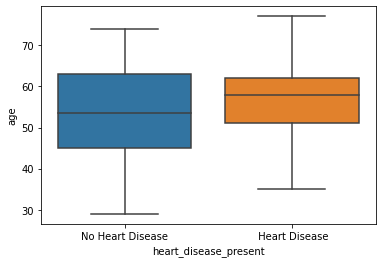

In [36]:
sns.boxplot(data=df,x='heart_disease_present',y='age')
plt.show()

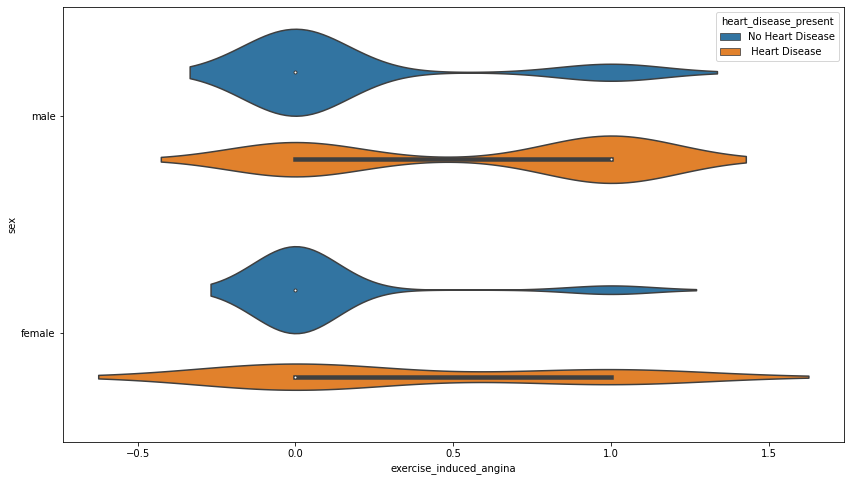

In [37]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df,x='exercise_induced_angina',y='sex',hue='heart_disease_present')
plt.show()

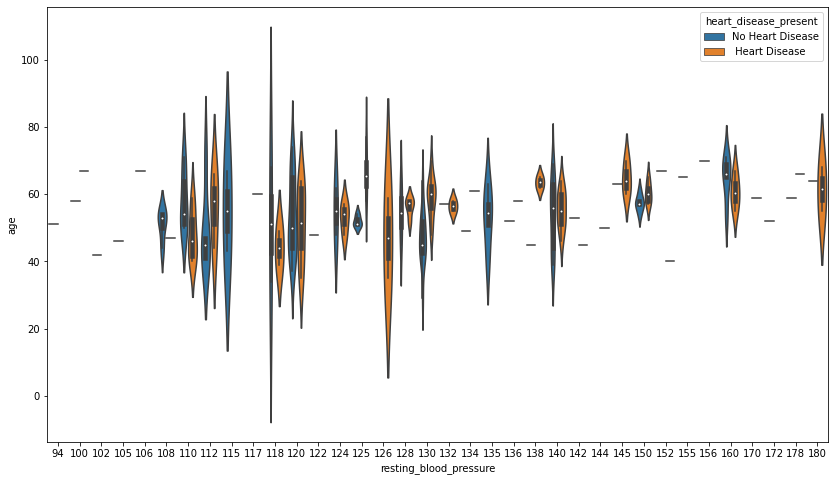

In [38]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df,x='resting_blood_pressure',y='age',hue='heart_disease_present')
plt.show()

##### As the resting blood pressure increases patients are more prone to heart diesease

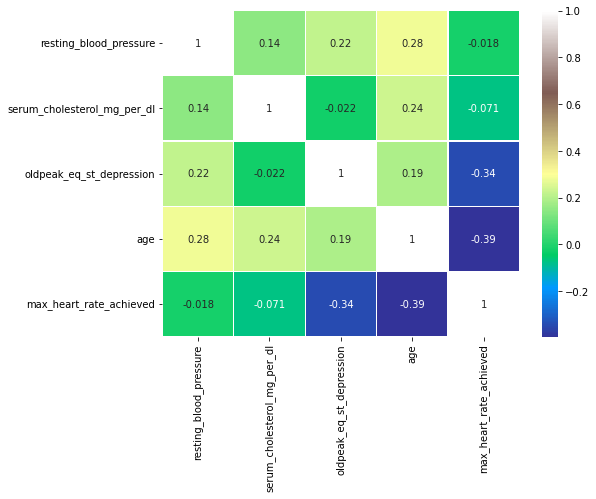

In [42]:
numeric_columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved']
sns.heatmap(data[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

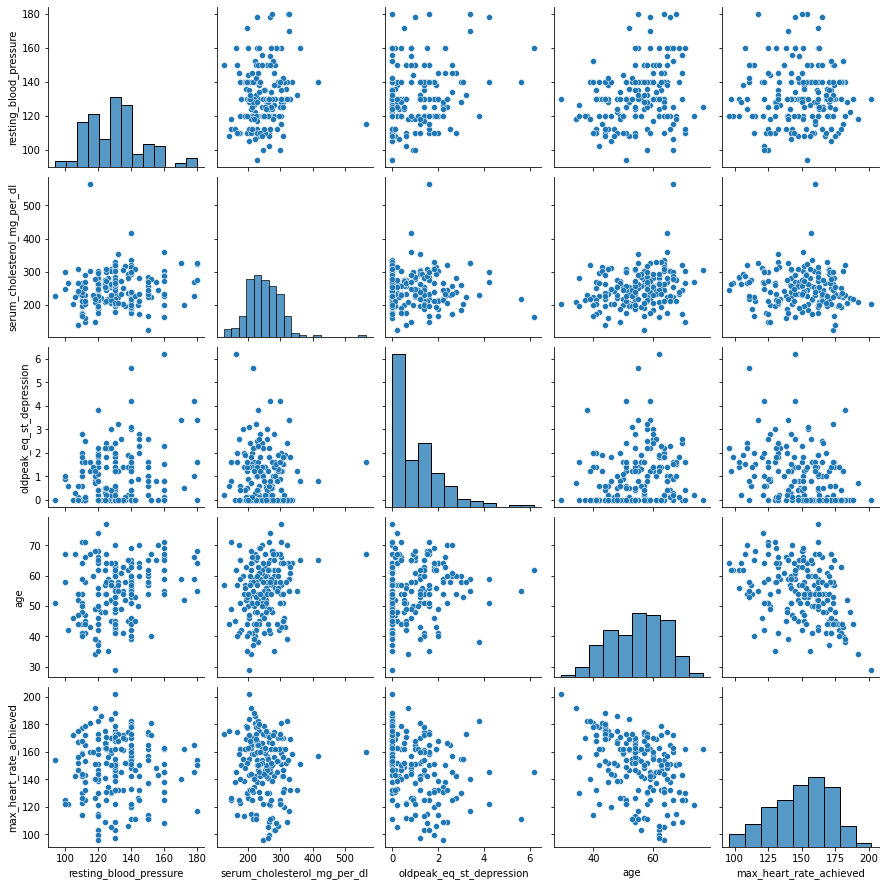

In [51]:
sns.pairplot(data[numeric_columns])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

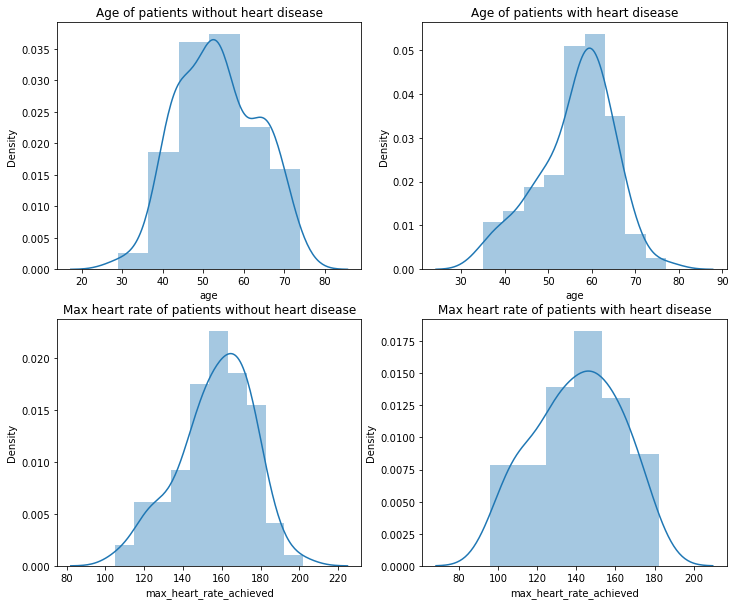

In [ ]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['heart_disease_present']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(data[data['heart_disease_present']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(data[data['heart_disease_present']==0].max_heart_rate_achieved )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(data[data['heart_disease_present']==1].max_heart_rate_achieved )
plt.title('Max heart rate of patients with heart disease')
plt.show()


- Above graph shows the distribution of data Age and Max heart rate of the patients with and without heart disease

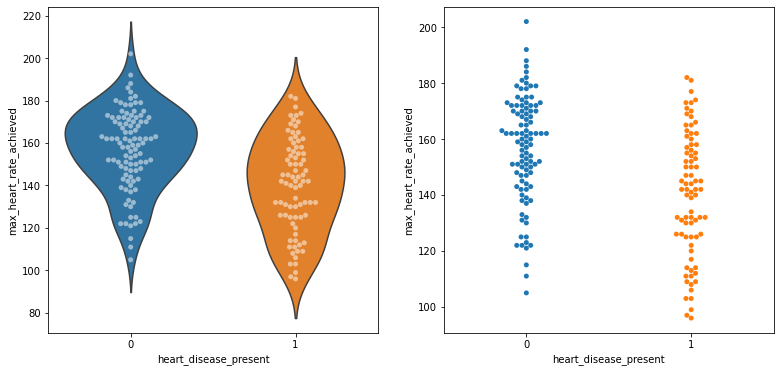

In [26]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="heart_disease_present", y="max_heart_rate_achieved", data=data, inner=None)
sns.swarmplot(x="heart_disease_present", y="max_heart_rate_achieved", data=data, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="heart_disease_present", y="max_heart_rate_achieved", data=data)
plt.show()


In [345]:
# categorical features
cat_val=[feature for feature in data if len(data[feature].unique())<=10]

cont_val=[feature for feature in data if len(data[feature].unique())>10 if data[feature].dtypes != 'O']

In [28]:
data1=['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina']
data1

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

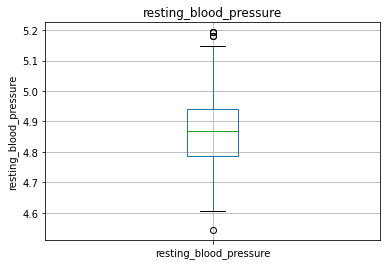

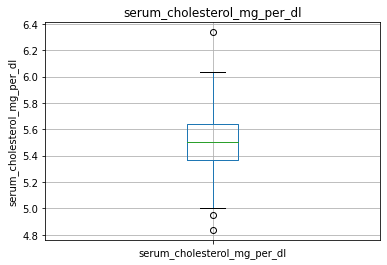

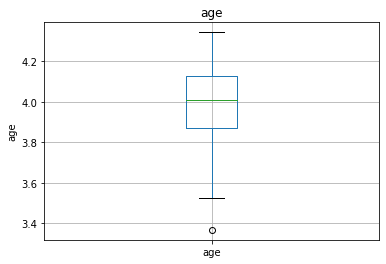

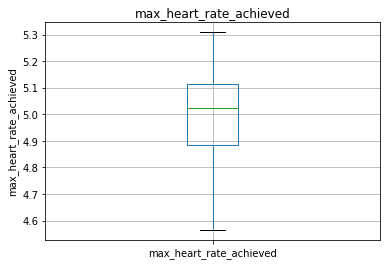

In [29]:
for feature in cont_val:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

- Here we can see that there are  some outlier in resting_blood_pressure, serum_cholesterol_mg_per_dl, and age

# Feature Engineering

In [30]:
data['heart_disease_present'].value_counts()


0    100
1     80
Name: heart_disease_present, dtype: int64

In [31]:
data['heart_disease_present'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Name: heart_disease_present, Length: 180, dtype: bool

In [32]:
data['heart_disease_present'].sum()

80

In [33]:
data['heart_disease_present'].unique()


array([0, 1], dtype=int64)

In [34]:
data.isnull().sum()


patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

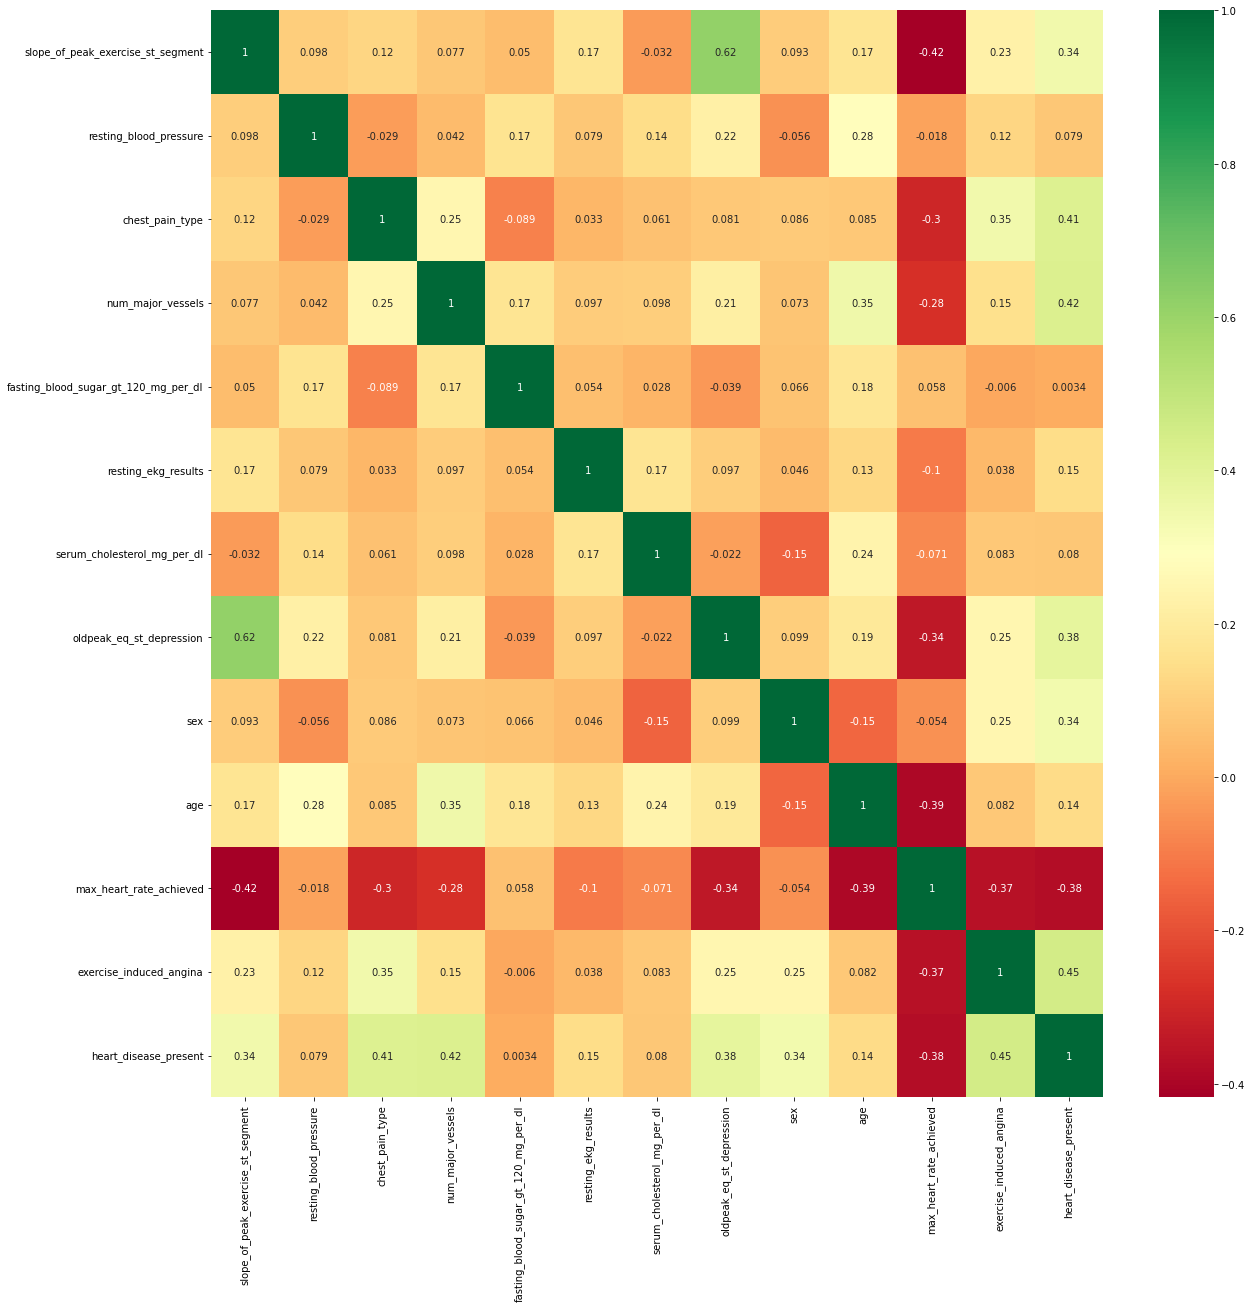

In [35]:
## Checking correlation

plt.figure(figsize=(20, 20))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})#plotting heat map to check correlation
plt.show()

Observation : 
- here we can see that all features shows good positive correlation with target except max_heart_rate_achieved.
- max_heart_rate_achieved shows good negative correlation with target



## Model Creation

In [330]:
data.drop('patient_id',axis='columns',inplace=True)
data.head()


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [331]:
# Using label encoder to convert the categorical data to numerical data

# Ordinal data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.thal=lc.fit_transform(data.thal)


In [332]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [333]:
print(cat_val)


['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 'num_major_vessels', 'resting_ekg_results', 'heart_disease_present']


In [334]:
print(cont_val)


['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']


#### checking unique value of categorical features

In [335]:
data.slope_of_peak_exercise_st_segment.unique()

array([1, 2, 3], dtype=int64)

In [336]:
data.thal.unique()

array([1, 2, 0])

In [337]:
data.chest_pain_type.unique()

array([2, 3, 4, 1], dtype=int64)

In [338]:
data.num_major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

In [339]:
data.fasting_blood_sugar_gt_120_mg_per_dl.unique()

array([0, 1], dtype=int64)

In [340]:
data.resting_ekg_results.unique()

array([2, 0, 1], dtype=int64)

In [341]:
data.sex.unique()

array([1, 0], dtype=int64)

In [342]:
data.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [346]:
cat_val.remove('sex') # removed it becouse it is already in the form of (0,1),so encoding is not needed.
cat_val.remove('exercise_induced_angina')# removed it becouse it is already in the form of (0,1),so encoding is not needed.
cat_val.remove('fasting_blood_sugar_gt_120_mg_per_dl')# removed it becouse it is already in the form of (0,1),so encoding is not needed.
data = pd.get_dummies(data, columns = cat_val,drop_first = True)
data.head(6)

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_1,thal_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2,heart_disease_present_1
0,-0.195195,0,1.118269,-0.903207,1,-1.053964,0.932485,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,-1.256320,0,-0.669778,0.527616,0,-0.087134,0.387084,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,-0.372049,0,1.042182,-0.903207,1,2.383654,0.568884,1,0,0,1,0,0,0,1,0,0,1,0,1,1
3,1.219639,0,-0.498582,-0.903207,1,-1.591092,1.432436,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,2.752375,0,0.395442,2.852703,1,0.449994,-0.203768,0,0,1,0,1,0,0,0,0,0,0,0,1,0
5,-0.077292,0,-1.316518,-0.903207,1,-1.376241,0.023483,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [347]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[cont_val]=sc.fit_transform(data[cont_val])
data.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_1,thal_2,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2,heart_disease_present_1
0,-0.195195,0,1.118269,-0.903207,1,-1.053964,0.932485,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,-1.256320,0,-0.669778,0.527616,0,-0.087134,0.387084,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,-0.372049,0,1.042182,-0.903207,1,2.383654,0.568884,1,0,0,1,0,0,0,1,0,0,1,0,1,1
3,1.219639,0,-0.498582,-0.903207,1,-1.591092,1.432436,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,2.752375,0,0.395442,2.852703,1,0.449994,-0.203768,0,0,1,0,1,0,0,0,0,0,0,0,1,0


### Spliting data

In [348]:
X = data.drop('heart_disease_present_1',axis=1)
y = data['heart_disease_present_1']

In [349]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

## Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [351]:
y_pred=clf.predict(X_train)

In [352]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=uint8)

In [353]:
y_pred_prob=clf.predict_proba(X_train)

In [354]:
data.heart_disease_present_1.value_counts()

0    100
1     80
Name: heart_disease_present_1, dtype: int64

In [355]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [356]:
cm=confusion_matrix(y_train,y_pred)
print(cm)

[[64  8]
 [10 53]]


In [357]:
pd.crosstab(y_train,y_pred)

col_0,0,1
heart_disease_present_1,,
0,64,8
1,10,53


In [358]:
recall=recall_score(y_train,y_pred)
recall

0.8412698412698413

In [359]:
precision=precision_score(y_train,y_pred)
precision

0.8688524590163934

In [360]:
f1score=f1_score(y_train,y_pred)
f1score

0.8548387096774194

In [361]:
cr=classification_report(y_train,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        72
           1       0.87      0.84      0.85        63

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



In [362]:
y_pred=clf.predict(X_test)

In [363]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1], dtype=uint8)

In [364]:
y_pred_prob=clf.predict_proba(X_test)

In [365]:
data.heart_disease_present_1.value_counts()

0    100
1     80
Name: heart_disease_present_1, dtype: int64

In [366]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[24  4]
 [ 6 11]]


In [367]:
pd.crosstab(y_test,y_pred)

col_0,0,1
heart_disease_present_1,,
0,24,4
1,6,11


In [368]:
recall=recall_score(y_test,y_pred)
recall

0.6470588235294118

In [369]:
precision=precision_score(y_test,y_pred)
precision

0.7333333333333333

In [370]:
f1score=f1_score(y_test,y_pred)
f1score

0.6875

In [371]:
acc=accuracy_score(y_test,y_pred)
acc

0.7777777777777778

In [372]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.73      0.65      0.69        17

    accuracy                           0.78        45
   macro avg       0.77      0.75      0.76        45
weighted avg       0.77      0.78      0.77        45



In [373]:
## Balacing the data

from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 100, 1: 80})
Counter({0: 100, 1: 100})


In [374]:
## preparing training and testing data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

## Decision Tree

In [375]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0], dtype=uint8)

In [376]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train


0.98

In [377]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.96      0.98        76

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [378]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
heart_disease_present_1,,
0,74,0
1,3,73


In [379]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.9798657718120806

In [381]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.82

In [382]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.7999999999999999

In [383]:
recall=recall_score(y_test,y_hat)
recall

0.75

In [384]:
precision=precision_score(y_test,y_hat)
precision

0.8571428571428571

In [385]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.86      0.75      0.80        24

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



[Text(0.5625, 0.95, 'X[10] <= 0.812\nentropy = 1.0\nsamples = 150\nvalue = [74, 76]'),
 Text(0.2916666666666667, 0.85, 'X[14] <= 0.579\nentropy = 0.727\nsamples = 74\nvalue = [15, 59]'),
 Text(0.16666666666666666, 0.75, 'X[8] <= 0.797\nentropy = 0.995\nsamples = 24\nvalue = [11, 13]'),
 Text(0.1111111111111111, 0.65, 'X[16] <= 0.714\nentropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.08333333333333333, 0.55, 'X[6] <= 0.122\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.05555555555555555, 0.45, 'X[9] <= 0.622\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.027777777777777776, 0.35, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08333333333333333, 0.35, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1111111111111111, 0.45, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.1388888888888889, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.65, 'X[15] <= 0.938\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Tex

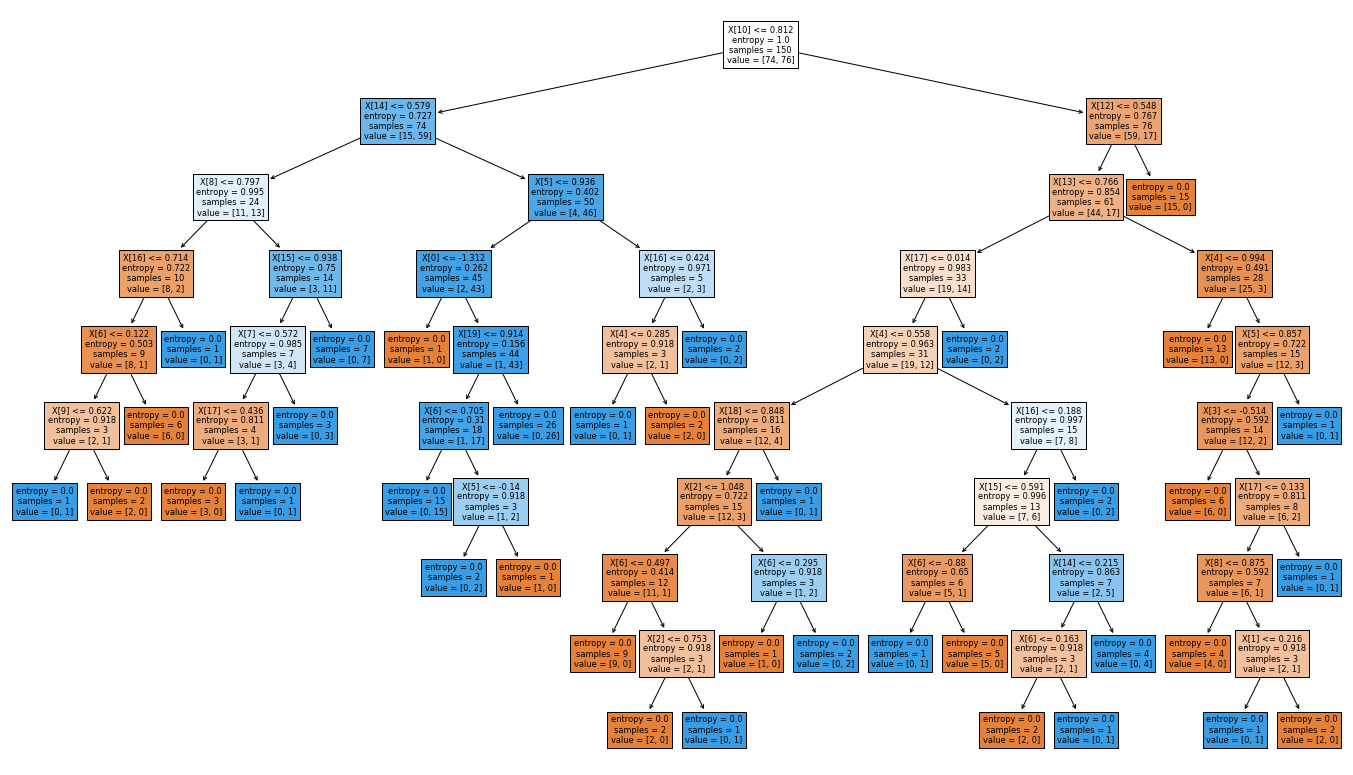

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

## Random Forest


In [386]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [387]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p)

1.0

In [388]:
y_predict=rf_clf.predict(X_test)#testing

In [389]:
y_predict

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0], dtype=uint8)

In [395]:
from sklearn.metrics import accuracy_score,classification_report,f1_score 
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.79      0.79      0.79        24

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [396]:
acc=accuracy_score(y_test,y_predict)
acc

0.8

In [397]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.7916666666666666

In [398]:
recall=recall_score(y_test,y_predict)
recall

0.7916666666666666

In [399]:
precision=precision_score(y_test,y_predict)
precision

0.7916666666666666

 ## SVM

In [400]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [401]:
y.value_counts()

0    100
1     80
Name: heart_disease_present_1, dtype: int64

In [402]:
## balancing the data

# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [403]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [404]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))


Actual Classes Counter({0: 73, 1: 62})
SMOTE Classes Counter({0: 73, 1: 73})


In [405]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [406]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [407]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7777777777777778

In [408]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.75      0.67      0.71        18

    accuracy                           0.78        45
   macro avg       0.77      0.76      0.76        45
weighted avg       0.78      0.78      0.78        45



In [409]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
heart_disease_present_1,,
0,23,4
1,6,12


In [412]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.7058823529411765

In [413]:
precision=precision_score(y_test,y_hat)
precision

0.75

In [278]:
recall

0.7916666666666666

In [279]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.78431373 0.74509804 0.73333333]
Cross validation Score: 0.7542483660130719
Std : 0.021795205229454984


# KNN

In [414]:
from sklearn.neighbors import KNeighborsClassifier

In [415]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

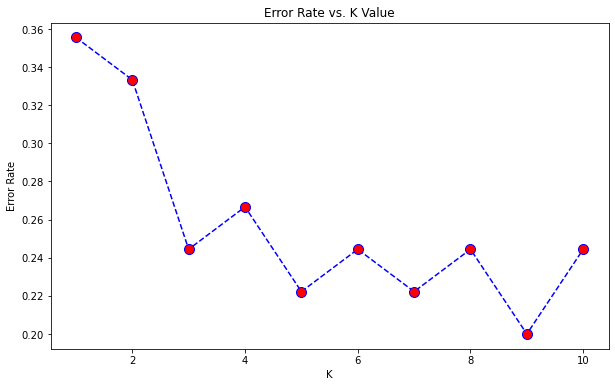

In [416]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [417]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)# Predict 
y_pred = knn.predict(X_test)

In [418]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7777777777777778


In [419]:
recall=recall_score(y_test,y_pred)
recall

0.7222222222222222

In [420]:
f1=f1_score(y_test,y_pred)
f1

0.7222222222222222

In [421]:
precision=precision_score(y_test,y_pred)
precision

0.7222222222222222

In [422]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.72      0.72      0.72        18

    accuracy                           0.78        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45



# Conclusion

### Challenges Faced

   - Domain Analysis
   - Understanding the data
   - Doing Hyperparameter Tunning
   - Working with  different Machine Learning Models

In [423]:

from prettytable import PrettyTable

#Creating objects of Prettytable
x=PrettyTable()
y=PrettyTable()

In [424]:
x.field_names = ["Model(Test)","Accuracy" ,"F1_Score","Recall","Precision"]
x.add_row(["Logistic Regression", '0.78','0.69','0.65','0.73'])
x.add_row(["K-Nearest Neighbor", '0.78','0.72','0.72','0.72'])
x.add_row(["Support Vector Machine", '0.78','0.70','0.79','0.75'])
x.add_row(["Random Forest", '0.80', '0.79','0.79','0.79'])
x.add_row(["Decision Tree", '0.82', '0.80','0.75','0.85'])

In [425]:
print(x)

+------------------------+----------+----------+--------+-----------+
|      Model(Test)       | Accuracy | F1_Score | Recall | Precision |
+------------------------+----------+----------+--------+-----------+
|  Logistic Regression   |   0.78   |   0.69   |  0.65  |    0.73   |
|   K-Nearest Neighbor   |   0.78   |   0.72   |  0.72  |    0.72   |
| Support Vector Machine |   0.78   |   0.70   |  0.79  |    0.75   |
|     Random Forest      |   0.80   |   0.79   |  0.79  |    0.79   |
|     Decision Tree      |   0.82   |   0.80   |  0.75  |    0.85   |
+------------------------+----------+----------+--------+-----------+


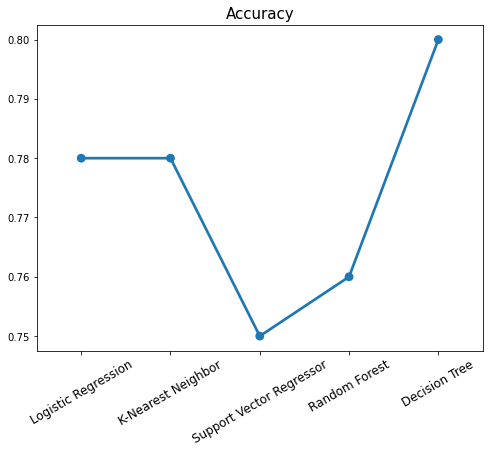

In [426]:
data = {'Logistic Regression':0.78, 'K-Nearest Neighbor':0.78,'Support Vector Regressor':0.75,'Random Forest':0.76,'Decision Tree':0.80}

courses = list(data.keys())
values = list(data.values())

plt.figure(figsize=(8,6))
sns.pointplot(x=courses, y=values)
plt.title("Accuracy", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

We have tried with five different machine learning algorithms on the dataset

- Logistic Regression
- KNN
- Random Forest
- SVM
- Decision Tree

After observing all the models,we have found out that Decision Tree model is giving us the best score and is the optimized model for the given dataset